# *Data Cleaning*
1. Handling Missing Data.
2. Outlier Detection and Handling.
3. Data Scaling and Transformation.
4. Encoding Categorical Variables.
5. Handling Duplicates.
6. Dealing with Inconsistent Data.

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv('datasets/loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## **Find Missing Values**

In [78]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [79]:
"""
calculate missing values in percentage
If any column have more than or equal to 50 percent missing data 
don't use that column
"""
(df.isnull().sum()/df.shape[0])*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [80]:
#total missing values
df.isnull().sum().sum()

149

In [81]:
# total values
df.shape[0]*df.shape[1]

7982

In [82]:
"""
missing data percentage
if missing data percentage is greater than or equal
to 50% don't use that dataset
"""
(df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100

1.8667000751691305

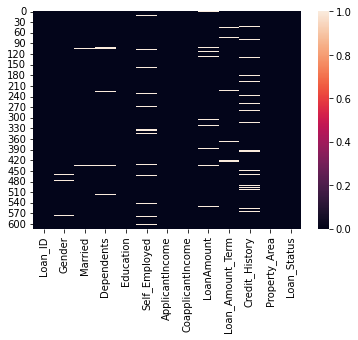

In [83]:
sns.heatmap(df.isnull());

## **Handle Missing Values**

In [84]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [85]:
df.drop(["Credit_History"],axis=1,inplace=True)

In [86]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Property_Area         0
Loan_Status           0
dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 57.7+ KB


In [88]:
# backward filling
df.fillna(method='bfill')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,Urban,Y


In [89]:
# forward filling
df.fillna(method='ffill')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,Urban,Y


In [90]:
df.fillna(method='bfill',axis=1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,360.0,360.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,Urban,Y


In [91]:
mode_gender = df.Gender.mode()[0]
print(mode_gender)
df.Gender.fillna(mode_gender,inplace=True)

Male


In [92]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Property_Area         0
Loan_Status           0
dtype: int64

In [93]:
# Fill NaN values in object type columns with their respective mode
for column in df.select_dtypes(include=['object']).columns:
    mode_value = df[column].mode()[0]  # Get the mode of the column
    df[column].fillna(mode_value, inplace=True)

In [94]:
df.isnull().sum()


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Property_Area         0
Loan_Status           0
dtype: int64

### Missing values fill using sklearn

In [95]:
df = pd.read_csv('datasets/loan.csv')
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [96]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [98]:
df.select_dtypes(include=['float64','int64']).columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [99]:
from sklearn.impute import SimpleImputer

In [100]:
si = SimpleImputer(strategy='mean')
ar = si.fit_transform(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']])

In [101]:
df['LoanAmount'].mean()

146.41216216216216

In [102]:
new_df = pd.DataFrame(ar,columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'])
new_df.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,146.412162,360.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0
2,3000.0,0.0,66.000000,360.0,1.0


In [103]:
new_df.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

### One Hot Encoding

In [104]:
df= pd.read_csv('datasets/loan.csv')

In [105]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [106]:
df.Gender.fillna(df.Gender.mode()[0],inplace=True)

In [107]:
df.Married.fillna(df.Married.mode()[0],inplace=True)

In [108]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [109]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


#### 1. Get Dummies to make onehot encoding

In [110]:
en_df = df[['Gender','Married']]
en_df

,Gender,Married
0,Male,No
1,Male,Yes
2,Male,Yes
3,Male,Yes
4,Male,No
...,...,...
609,Female,No
610,Male,Yes
611,Male,Yes
612,Male,Yes


In [111]:
pd.get_dummies(en_df)

,Gender_Female,Gender_Male,Married_No,Married_Yes
0,0,1,1,0
1,0,1,0,1
2,0,1,0,1
3,0,1,0,1
4,0,1,1,0
...,...,...,...,...
609,1,0,1,0
610,0,1,0,1
611,0,1,0,1
612,0,1,0,1


#### 1. sklearn to make onehot encoding

In [112]:
from sklearn.preprocessing import OneHotEncoder

In [113]:
ohe = OneHotEncoder()
pd.DataFrame(ohe.fit_transform(en_df).toarray(),
             columns=['Gender_Female','Gender_male',
                      'Married_No','Married_Yes'])

,Gender_Female,Gender_male,Married_No,Married_Yes
0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.0
...,...,...,...,...
609,1.0,0.0,1.0,0.0
610,0.0,1.0,0.0,1.0
611,0.0,1.0,0.0,1.0
612,0.0,1.0,0.0,1.0


In [114]:
# Fit and transform the data
transformed_data = ohe.fit_transform(en_df).toarray()

# Get feature names
feature_names = ohe.get_feature_names_out(en_df.columns)

# Create the DataFrame with automatic column names
encoded_df = pd.DataFrame(transformed_data, columns=feature_names)

encoded_df

,Gender_Female,Gender_Male,Married_No,Married_Yes
0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.0
...,...,...,...,...
609,1.0,0.0,1.0,0.0
610,0.0,1.0,0.0,1.0
611,0.0,1.0,0.0,1.0
612,0.0,1.0,0.0,1.0


In [115]:
ohe = OneHotEncoder(drop='first')
# Fit and transform the data
transformed_data = ohe.fit_transform(en_df).toarray()

# Get feature names
feature_names = ohe.get_feature_names_out(en_df.columns)

# Create the DataFrame with automatic column names
encoded_df = pd.DataFrame(transformed_data, columns=feature_names)

encoded_df

,Gender_Male,Married_Yes
0,1.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,0.0
...,...,...
609,0.0,0.0
610,1.0,1.0
611,1.0,1.0
612,1.0,1.0


### Label Encoding

In [116]:
df = pd.DataFrame({'name':['xyz','cow','cat','dog']})
df

,name
0,xyz
1,cow
2,cat
3,dog


In [117]:
from sklearn.preprocessing import LabelEncoder

In [118]:
le = LabelEncoder()
df['en_name'] = le.fit_transform(df['name'])

In [119]:
df

,name,en_name
0,xyz,3
1,cow,1
2,cat,0
3,dog,2


### Nominal Encoding(categorical data but no dependency)

In [120]:
df = pd.read_csv('datasets/loan.csv')

In [121]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [122]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [123]:
le = LabelEncoder()
le.fit(df.Property_Area)

LabelEncoder()

In [124]:
df.Property_Area = le.transform(df.Property_Area)

In [125]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,2,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,2,Y


### Ordinal Encoding
1. using sklearn
2. using mapping

In [126]:
df = pd.DataFrame({"size":['s','m','l','xl','s','m','l','xl','m']})
df

,size
0,s
1,m
2,l
3,xl
4,s
5,m
6,l
7,xl
8,m


In [127]:
order = [['s','m','l','xl']]

In [128]:
from sklearn.preprocessing import OrdinalEncoder

In [129]:
oe = OrdinalEncoder(categories=order)
oe.fit(df[['size']])

OrdinalEncoder(categories=[['s', 'm', 'l', 'xl']])

In [130]:
df['en_size'] = oe.transform(df[['size']])

In [131]:
df

,size,en_size
0,s,0.0
1,m,1.0
2,l,2.0
3,xl,3.0
4,s,0.0
5,m,1.0
6,l,2.0
7,xl,3.0
8,m,1.0


### 2. mapping

In [132]:
df = pd.DataFrame({"size":['s','m','l','xl','s','m','l','xl','m']})
df

,size
0,s
1,m
2,l
3,xl
4,s
5,m
6,l
7,xl
8,m


In [133]:
ord_mapping = {
    's':0,
    'm':1,
    'l':2,
    'xl':3
}

In [134]:
df['en_size'] = df['size'].map(ord_mapping)

In [135]:
df

,size,en_size
0,s,0
1,m,1
2,l,2
3,xl,3
4,s,0
5,m,1
6,l,2
7,xl,3
8,m,1


In [136]:
df = pd.read_csv('datasets/loan.csv')
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [137]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [138]:
property_area_order =[ [
    'Rural',
    'Semiurban',
    'Urban'
]]

In [139]:
from sklearn.preprocessing import OneHotEncoder

In [140]:
oe = OrdinalEncoder(categories=property_area_order)
df['Property_Area_en'] = oe.fit_transform(df[['Property_Area']])

In [141]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_en
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,2.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,2.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,2.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,2.0


## Outlier

In [142]:
df = pd.read_csv('datasets/loan.csv')
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [144]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


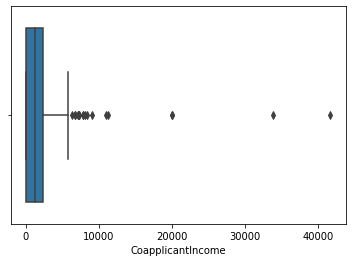

In [145]:
sns.boxplot(x='CoapplicantIncome',data=df);

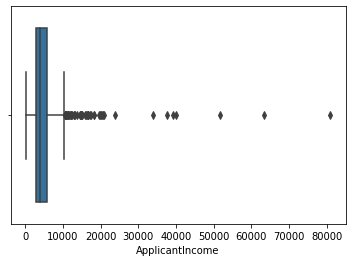

In [146]:
sns.boxplot(x='ApplicantIncome',data=df);

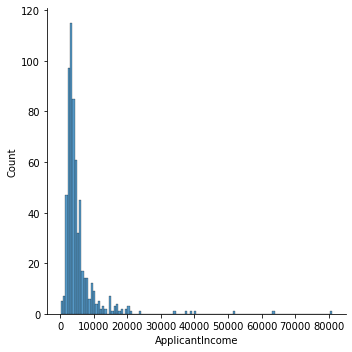

In [147]:
sns.displot(df['ApplicantIncome'])
plt.show()

In [148]:
nums = [1,2,3,4,5,6]
sum(nums)/len(nums)
#output 3.5 which is normal we can easily use

3.5

<AxesSubplot: >

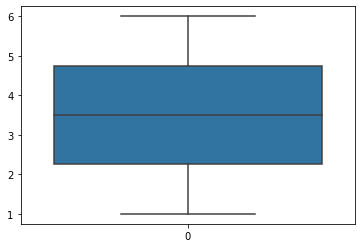

In [149]:
sns.boxplot(nums)

In [150]:
nums = [1,2,3,4,5,6,7,10,15,20,21,25,100]
sum(nums)/len(nums)
#output 16.9 which is not normal we can not directly use it.
# we first identify and remove outlier which is in this case 100


16.846153846153847

<AxesSubplot: >

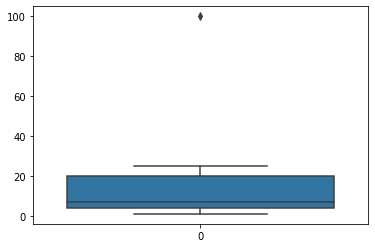

In [151]:
sns.boxplot(nums)

### Outlier remove using IQR

In [152]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<AxesSubplot: xlabel='CoapplicantIncome'>

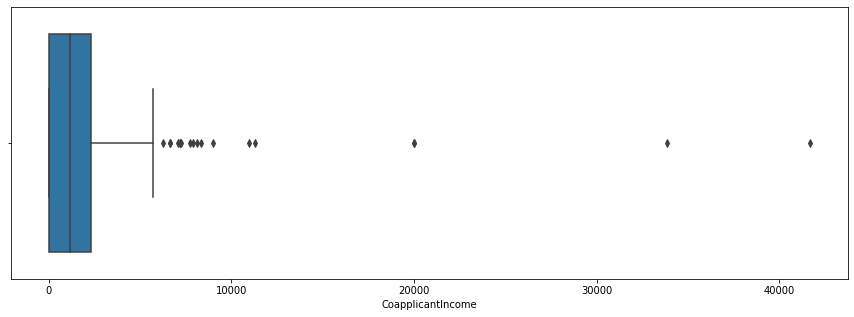

In [153]:
plt.figure(figsize=(15,5))
sns.boxplot(x='CoapplicantIncome',data=df)

<img src='./images/IQR.PNG' width=600>

In [154]:
df.shape

(614, 13)

In [155]:
q1 = df['CoapplicantIncome'].quantile(0.25)
q1

0.0

In [156]:
q3 = df['CoapplicantIncome'].quantile(0.75)
q3

2297.25

In [157]:
IQR = q3-q1
min_range = q1-(1.5*IQR)
max_range = q3+(1.5*IQR)
IQR,min_range,max_range

(2297.25, -3445.875, 5743.125)

In [158]:
new_df = df[(df['CoapplicantIncome']>=min_range) & (df['CoapplicantIncome']<=max_range)]
new_df[['ApplicantIncome']]

,ApplicantIncome
0,5849
1,4583
2,3000
3,2583
4,6000
...,...
609,2900
610,4106
611,8072
612,7583


<AxesSubplot: xlabel='CoapplicantIncome'>

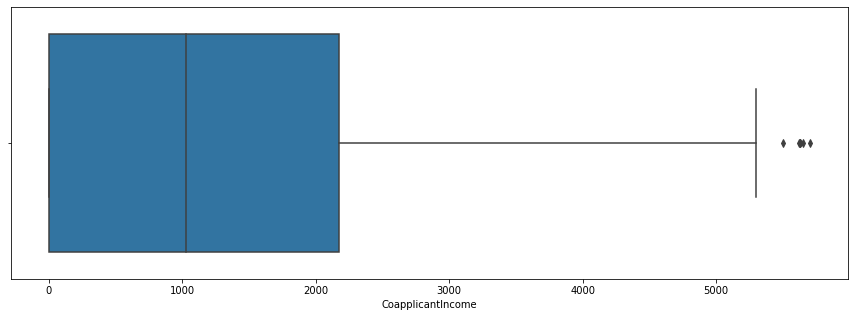

In [159]:
#few outliers are bearable reason is that some time they may be our important features
plt.figure(figsize=(15,5))
sns.boxplot(x='CoapplicantIncome',data=new_df)

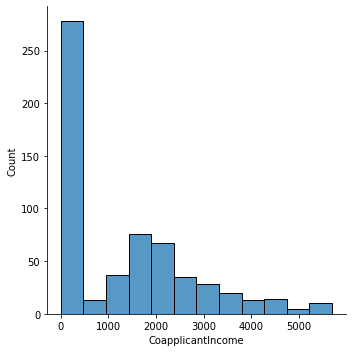

In [160]:
sns.displot(new_df['CoapplicantIncome'])
plt.show()

## Z-Score to remove Outlier
z-score = (x-mean)/std

In [161]:
df = pd.read_csv('./datasets/loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [162]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [163]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<AxesSubplot: xlabel='CoapplicantIncome'>

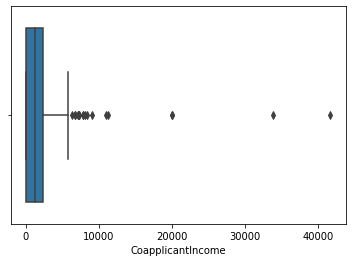

In [164]:
sns.boxplot(x='CoapplicantIncome',data=df)

C:\Users\Desktop\AppData\Local\Temp\ipykernel_24092\2149142820.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


<AxesSubplot: xlabel='CoapplicantIncome', ylabel='Density'>

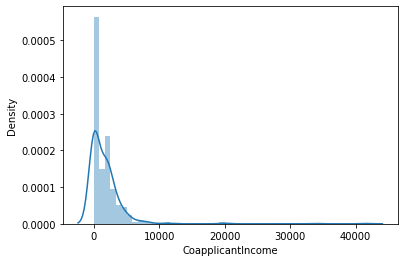

In [165]:
sns.distplot(df['CoapplicantIncome'])

In [166]:
min_range = df['CoapplicantIncome'].mean() - (3*df['CoapplicantIncome'].std())
max_range = df['CoapplicantIncome'].mean() + (3*df['CoapplicantIncome'].std())
min_range,max_range

(-7157.4993096454655, 10399.990905699668)

In [167]:
df = df[(df['CoapplicantIncome']>=min_range) & (df['CoapplicantIncome']<=max_range)]

In [168]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,608.000000,608.000000,586.000000,594.000000,559.000000
mean,5416.143092,1410.646250,145.136519,342.121212,0.842576
std,6123.586316,1685.286222,83.825124,65.088956,0.364526
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2892.750000,0.000000,100.000000,360.000000,1.000000
50%,3813.500000,1125.500000,127.500000,360.000000,1.000000
75%,5803.750000,2250.750000,165.750000,360.000000,1.000000
max,81000.000000,8980.000000,700.000000,480.000000,1.000000


<AxesSubplot: xlabel='CoapplicantIncome'>

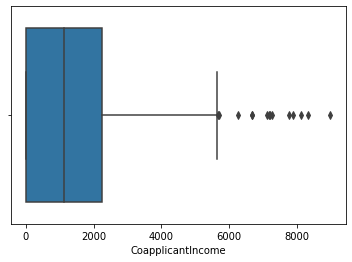

In [169]:
sns.boxplot(x='CoapplicantIncome',data=df)

In [170]:
df = pd.read_csv('./datasets/loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [171]:
z_score = (
    df['CoapplicantIncome']-df['CoapplicantIncome'].mean()
    )/df['CoapplicantIncome'].std()
z_score

0     -0.554036
1     -0.038700
2     -0.554036
3      0.251774
4     -0.554036
         ...   
609   -0.554036
610   -0.554036
611   -0.472019
612   -0.554036
613   -0.554036
Name: CoapplicantIncome, Length: 614, dtype: float64

In [172]:
df['z_score']=z_score

In [173]:
df[df['z_score']<3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,-0.472019
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,-0.554036


In [174]:
df[df['z_score']<3].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,z_score
count,608.000000,608.000000,586.000000,594.000000,559.000000,608.000000
mean,5416.143092,1410.646250,145.136519,342.121212,0.842576,-0.071969
std,6123.586316,1685.286222,83.825124,65.088956,0.364526,0.575920
min,150.000000,0.000000,9.000000,12.000000,0.000000,-0.554036
25%,2892.750000,0.000000,100.000000,360.000000,1.000000,-0.554036
50%,3813.500000,1125.500000,127.500000,360.000000,1.000000,-0.169413
75%,5803.750000,2250.750000,165.750000,360.000000,1.000000,0.215123
max,81000.000000,8980.000000,700.000000,480.000000,1.000000,2.514740


## **Feature Scaling(Standardization)**

In [175]:
df = pd.read_csv('./datasets/loan.csv')

In [176]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

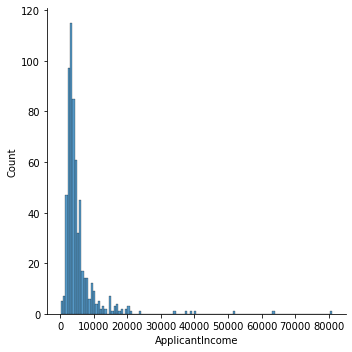

In [177]:
sns.displot(df['ApplicantIncome'])

In [178]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [179]:
from sklearn.preprocessing import StandardScaler

In [180]:
ss = StandardScaler()

In [181]:
ss.fit(df[['ApplicantIncome']])

StandardScaler()

In [182]:
df['ApplicantIncome_ss'] = ss.transform(df[['ApplicantIncome']])

In [183]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.410130
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.212557
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.437174
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.357064


In [184]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01


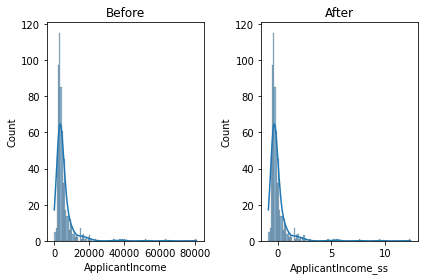

In [185]:
# First subplot
plt.subplot(1, 2, 1)
plt.title("Before")
sns.histplot(df['ApplicantIncome'], kde=True)

# Second subplot
plt.subplot(1, 2, 2)
plt.title("After")
sns.histplot(df['ApplicantIncome_ss'], kde=True)

plt.tight_layout()  # Adjusts the subplot layout to fit into the figure area.
plt.show()

## **MinMaX Scaling(Normalization)**

In [186]:
  df.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
ApplicantIncome_ss     0
dtype: int64

In [187]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01


<AxesSubplot: xlabel='CoapplicantIncome', ylabel='Count'>

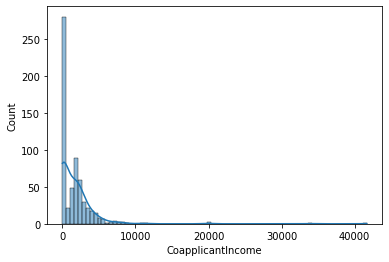

In [188]:
sns.histplot(df['CoapplicantIncome'],kde=True)

In [189]:
from sklearn.preprocessing import MinMaxScaler

In [190]:
ms = MinMaxScaler()

In [191]:
ms.fit(df[['CoapplicantIncome']])

MinMaxScaler()

In [192]:
df['CoapplicantIncome_ms']=ms.transform(df[['CoapplicantIncome']])

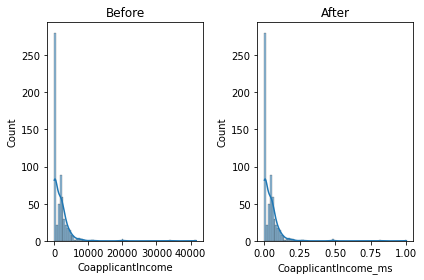

In [193]:
# First subplot
plt.subplot(1, 2, 1)
plt.title("Before")
sns.histplot(df['CoapplicantIncome'], kde=True)

# Second subplot
plt.subplot(1, 2, 2)
plt.title("After")
sns.histplot(df['CoapplicantIncome_ms'], kde=True)

plt.tight_layout()  # Adjusts the subplot layout to fit into the figure area.
plt.show()

In [194]:
df = pd.read_csv('datasets/loan.csv')

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<AxesSubplot: xlabel='CoapplicantIncome', ylabel='Count'>

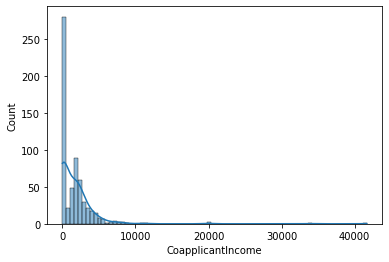

In [196]:
sns.histplot(df['CoapplicantIncome'],kde=True)

In [197]:
# q1 = df['CoapplicantIncome'].quantile(0.25)
# q3 = df['CoapplicantIncome'].quantile(0.75)
# iqr = q3-q1

In [198]:
# min_r = q1-(1.5*iqr)
# max_r = q3+(1.5*iqr)
# min_r,max_r

In [199]:
# df = df[df['CoapplicantIncome']<max_r]

<AxesSubplot: xlabel='CoapplicantIncome', ylabel='Count'>

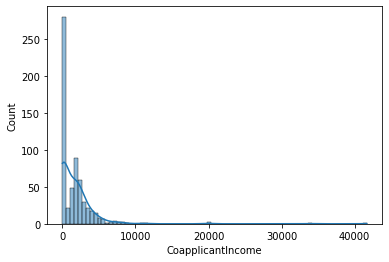

In [200]:
sns.histplot(df['CoapplicantIncome'],kde=True)

In [201]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [202]:
ft = FunctionTransformer(func=np.log1p)

In [203]:
ft.fit(df[['CoapplicantIncome']])

FunctionTransformer(func=<ufunc 'log1p'>)

In [204]:
df['CoapplicantIncome_tf'] = ft.transform(df[['CoapplicantIncome']])

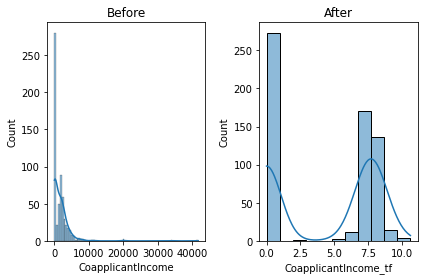

In [205]:
# First subplot
plt.subplot(1, 2, 1)
plt.title("Before")
sns.histplot(df['CoapplicantIncome'], kde=True)

# Second subplot
plt.subplot(1, 2, 2)
plt.title("After")
sns.histplot(df['CoapplicantIncome_tf'], kde=True)

plt.tight_layout()  # Adjusts the subplot layout to fit into the figure area.
plt.show()

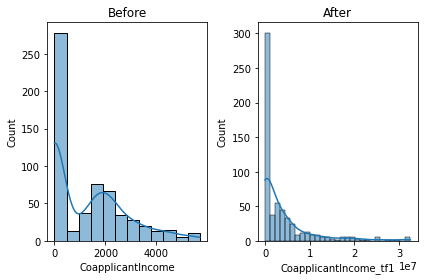

In [206]:
#use another function

q1 = df['CoapplicantIncome'].quantile(0.25)
q3 = df['CoapplicantIncome'].quantile(0.75)
iqr = q3-q1

min_r = q1-(1.5*iqr)
max_r = q3+(1.5*iqr)
df = df[df['CoapplicantIncome']<max_r]


ft = FunctionTransformer(func=lambda x:x**2)
ft.fit(df[['CoapplicantIncome']])
df['CoapplicantIncome_tf1'] = ft.transform(df[['CoapplicantIncome']])
# First subplot
plt.subplot(1, 2, 1)
plt.title("Before")
sns.histplot(df['CoapplicantIncome'], kde=True)

# Second subplot
plt.subplot(1, 2, 2)
plt.title("After")
sns.histplot(df['CoapplicantIncome_tf1'], kde=True)

plt.tight_layout()  # Adjusts the subplot layout to fit into the figure area.
plt.show()

# Feature Selection
### Forawrd Feature Selection

In [207]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector

In [208]:
df = pd.read_csv('datasets/diabetes.csv')

In [209]:
df = df[['Glucose','BloodPressure', 
    'SkinThickness','BMI',
    'Age', 'Outcome']]

In [210]:
df.head(3)

,Glucose,BloodPressure,SkinThickness,BMI,Age,Outcome
0,148,72,35,33.6,50,1
1,85,66,29,26.6,31,0
2,183,64,0,23.3,32,1


In [211]:
x = df.drop(['Outcome'],axis=1)
y = df['Outcome']

In [212]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [213]:
from sklearn.linear_model import LogisticRegression

In [214]:
lr = LogisticRegression()

In [215]:
x.shape

(768, 5)

In [216]:
def check(x,y,estimator,k_features,forward):
    fs = SequentialFeatureSelector(
        estimator=estimator,
        k_features=k_features,
        forward=forward
    )
    fs.fit(x,y)
    print('k_features:',k_features)
    print('k_score_:',round(fs.k_score_,3))
    print('k_feature_names_:',fs.k_feature_names_)

In [217]:
for k_features in range(x.shape[1]):
    check(x,y,estimator=lr,
          k_features=k_features+1,forward=True)

k_features: 1
k_score_: 0.747
k_feature_names_: ('Glucose',)
k_features: 2
k_score_: 0.759
k_feature_names_: ('Glucose', 'BMI')
k_features: 3
k_score_: 0.768
k_feature_names_: ('Glucose', 'BMI', 'Age')
k_features: 4
k_score_: 0.768
k_feature_names_: ('Glucose', 'BloodPressure', 'BMI', 'Age')
k_features: 5
k_score_: 0.768
k_feature_names_: ('Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Age')


In [218]:
for k_features in range(x.shape[1]):
    check(x,y,estimator=lr,
          k_features=k_features+1,forward=False)

k_features: 1
k_score_: 0.747
k_feature_names_: ('Glucose',)
k_features: 2
k_score_: 0.759
k_feature_names_: ('Glucose', 'BMI')
k_features: 3
k_score_: 0.768
k_feature_names_: ('Glucose', 'BMI', 'Age')
k_features: 4
k_score_: 0.768
k_feature_names_: ('Glucose', 'BloodPressure', 'BMI', 'Age')
k_features: 5
k_score_: 0.768
k_feature_names_: ('Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Age')


# Train Test Split

In [231]:
df = pd.read_csv('datasets/Boston.csv')
df=df[['MEDV','CRIM', 'ZN', 'INDUS', 'CHAS',
       'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO']]
df.rename(columns={'MEDV':"House_price"},inplace=True)
df

,House_price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7
...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0
502,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0
503,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0
504,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0


In [232]:
x=df.drop(['House_price'],axis=1)
y=df['House_price']

In [233]:
from sklearn.model_selection import train_test_split

In [234]:
x_train,x_test,y_train,y_test = train_test_split(
    x,y,train_size=0.75
)
print(f"x_train.shape:{x_train.shape}")
print(f"x_test.shape:{x_test.shape}")
print(f"y_train.shape:{y_train.shape}")
print(f"y_test.shape:{y_test.shape}")

x_train.shape:(379, 11)
x_test.shape:(127, 11)
y_train.shape:(379,)
y_test.shape:(127,)


# Simple Linear Regression

In [235]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [236]:
df = pd.read_csv('datasets/placement.csv')
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [238]:
#x should be 2d
x = df[['cgpa']]
#y should be 1d
y = df['package']


<AxesSubplot: xlabel='cgpa', ylabel='package'>

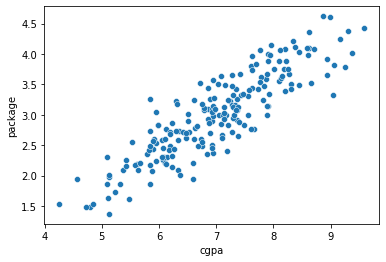

In [239]:
sns.scatterplot(x=df['cgpa'],y=y)

In [241]:
x_train,x_test,y_train,y_test = train_test_split(
    x,y,train_size=0.8,random_state=42
)
print(f"x_train.shape:{x_train.shape}")
print(f"x_test.shape:{x_test.shape}")
print(f"y_train.shape:{y_train.shape}")
print(f"y_test.shape:{y_test.shape}")

x_train.shape:(160, 1)
x_test.shape:(40, 1)
y_train.shape:(160,)
y_test.shape:(40,)


In [242]:
from sklearn.linear_model import LinearRegression

In [243]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [244]:
lr.predict([[6.89]])

c:\Users\Desktop\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.92962016])

In [247]:
print('accuracy:',lr.score(x_test,y_test))

accuracy: 0.7730984312051673
